In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data1=sio.loadmat('PA_1_matlab/poly_data.mat')

In [3]:
print data1

{'sampx': array([[-1.31701448,  0.93763982, -1.08750007, -1.61368873, -1.2664458 ,
        -1.15450337,  0.26177809, -0.29568377, -1.55716341,  0.75451085,
         1.06393532,  1.56086716,  1.49433277, -0.74917179,  0.66964579,
        -1.26324901,  0.57392856, -1.98265409,  1.53266188, -0.55170207,
        -0.45675826, -0.73604465,  1.29749965, -0.92340095,  0.40030965,
         0.00431016,  0.44082691,  0.97782642, -1.67139471,  0.86918266,
         0.35288361, -1.08510231, -1.31458641,  1.74614486, -0.54335475,
        -0.16332908, -1.07176633, -1.17663724,  0.25782398,  1.24760952,
         0.57320232,  1.8113091 , -1.32787735, -1.63461874, -1.0371066 ,
         1.34941838, -0.32533439,  0.10497248,  0.27242295, -1.38741825]]), 'sampy': array([[  6.47965192],
       [  1.09919175],
       [  4.75243053],
       [ 16.56235455],
       [  4.17810578],
       [  3.36120385],
       [  4.23118462],
       [ -0.97410879],
       [ 10.94580799],
       [  1.14359713],
       [ -0.376529

In [4]:
sampx=data1['sampx']
sampy=data1['sampy']
polyy=data1['polyy']
polyx=data1['polyx']
thtrue=data1['thtrue']

In [5]:
print thtrue.shape
print sampx.shape
print sampy.shape
print polyx.shape
print polyy.shape

print thtrue.T[0].shape
print sampx[0].shape

(6, 1)
(1, 50)
(50, 1)
(1, 100)
(100, 1)
(6,)
(50,)


(6, 50)
[[3.99387518e-02]
 [1.04428499e+00]
 [2.31546163e+00]
 [8.20659425e+00]
 [1.60924284e+00]
 [3.35012367e-01]
 [7.00108956e+00]
 [3.23905922e+00]
 [8.95946328e-01]
 [1.17041886e+00]
 [4.76954668e+00]
 [6.59412414e-05]
 [8.58139537e+00]
 [7.51179440e-01]
 [1.55857336e+00]
 [2.85751611e+00]
 [3.99020102e+00]
 [6.14226088e+00]
 [1.94411401e-01]
 [2.17779483e-01]
 [3.38160393e+00]
 [7.41062496e+00]
 [1.10974241e+00]
 [9.52322854e+00]
 [2.82344986e-02]
 [1.27027277e+01]
 [3.05318934e-02]
 [2.11531881e-04]
 [1.34538286e+00]
 [1.90182690e-01]
 [1.20951226e+00]
 [4.06236581e-01]
 [3.20711510e+01]
 [2.41446000e-01]
 [1.50681993e+00]
 [1.14889191e-01]
 [1.99402658e+00]
 [4.76988292e-01]
 [1.97367101e+01]
 [5.75986406e-01]
 [1.18712206e-01]
 [2.85594306e+00]
 [2.53035898e+00]
 [4.59761990e-01]
 [1.08278520e+01]
 [7.91601375e-01]
 [1.30115807e+00]
 [2.59478612e+00]
 [2.78721886e+00]
 [1.09273701e+00]]
[[ 6.15769274e-01]
 [ 1.10406633e+00]
 [ 1.33022515e+00]
 [-6.93228415e-01]
 [ 9.17835000e-

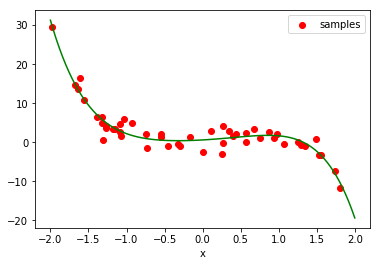

In [6]:
def polyfunc(sampx,thtrue):
    m=len(sampx[0])
    n=len(thtrue.T[0])
    X=np.zeros((n,m))
    for j in range(m):
        for i in range(n):
            X[i][j]=np.power(sampx[0][j],i)
    polyresA=np.dot(thtrue.T,X)
    print X.shape
    return polyresA,X
polyfunc,Phi=polyfunc(sampx,thtrue)

def LSfunc(polyfunc,sampy):
    res=np.power(sampy-polyfunc.T,2)
    return res

LS= LSfunc(polyfunc,sampy)
print LS

def paraestimate(Phi,sampy):
    A=np.linalg.inv(np.dot(Phi,Phi.T))
    theta_ls=np.dot(np.dot(A,Phi),sampy)
    return theta_ls
print paraestimate(Phi,sampy)
theta_real=paraestimate(Phi,sampy)
print theta_real.shape

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real[0][0]+theta_real[1][0]*x+theta_real[2][0]*np.power(x,2)+theta_real[3][0]*np.power(x,3)+theta_real[4][0]*np.power(x,4)+theta_real[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['sampx'],data1['sampy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()

[[ 0.68185088]
 [ 0.8032859 ]
 [ 1.17035187]
 [-0.43660814]
 [ 0.04726588]
 [-0.73411837]]
(6, 1)


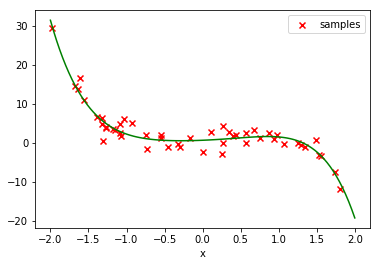

(6, 50)


In [7]:
#this is regularized fuc below 
def LSfuncReg(polyfunc,sampy,thtrue,lmb=1):
    res=np.power(sampy-polyfunc.T,2)+np.dot(lmb,np.power(thtrue,2))
    return res

def paraestimateReg(Phi,sampy,lmb=1):
    A=np.linalg.inv(np.dot(Phi,Phi.T)+lmb*np.eye(6))
    theta_ls=np.dot(np.dot(A,Phi),sampy)
    return theta_ls
print paraestimateReg(Phi,sampy)
theta_real_reg=paraestimateReg(Phi,sampy,lmb=1)
print theta_real_reg.shape

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_reg[0][0]+theta_real_reg[1][0]*x+theta_real_reg[2][0]*np.power(x,2)+theta_real_reg[3][0]*np.power(x,3)+theta_real_reg[4][0]*np.power(x,4)+theta_real_reg[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['sampx'],data1['sampy'],c='r',marker='x',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
print Phi.shape

[[   50.            -7.13846373    59.56833439   -15.02897815
    120.96530399   -34.17811531   -50.             7.13846373
    -59.56833439    15.02897815  -120.96530399    34.17811531]
 [   -7.13846373    59.56833439   -15.02897815   120.96530399
    -34.17811531   297.39820191     7.13846373   -59.56833439
     15.02897815  -120.96530399    34.17811531  -297.39820191]
 [   59.56833439   -15.02897815   120.96530399   -34.17811531
    297.39820191   -97.89296838   -59.56833439    15.02897815
   -120.96530399    34.17811531  -297.39820191    97.89296838]
 [  -15.02897815   120.96530399   -34.17811531   297.39820191
    -97.89296838   821.47877846    15.02897815  -120.96530399
     34.17811531  -297.39820191    97.89296838  -821.47877846]
 [  120.96530399   -34.17811531   297.39820191   -97.89296838
    821.47877846  -339.00343069  -120.96530399    34.17811531
   -297.39820191    97.89296838  -821.47877846   339.00343069]
 [  -34.17811531   297.39820191   -97.89296838   821.47877846
   

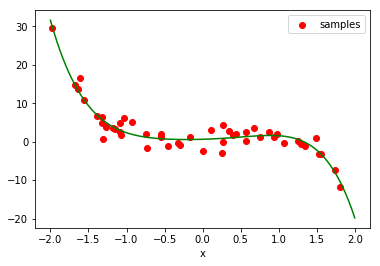

In [8]:
#Lasso 

def Lasso(Phi,sampy,thtrue,lmb=1):
    res=np.power(sampy-Phi.T,2)+np.dot(lmb,np.linalg.norm(thtrue,ord=1,axis=1,keepdims=False))#x_norm=np.linalg.norm(x, ord=None, axis=None, keepdims=False)
    return res
import scipy.optimize as opt

def paraestimateLasso(Phi,sampy,lmb=1):
    H=np.hstack((np.vstack((np.dot(Phi,Phi.T),np.dot(-Phi,Phi.T))),np.vstack((np.dot(-Phi,Phi.T),np.dot(Phi,Phi.T)))))
    fa=np.vstack((np.dot(Phi,sampy),-np.dot(Phi,sampy)))
    f=lmb*np.ones((12,1))-fa
    x_ans=np.zeros((12,1))
    fun=lambda x: float(0.5*np.dot((np.dot(x.T,H)),x)+np.dot(f.T,x))
    cons=({'type': 'ineq', 'fun': lambda x: x})
    x_ans_true=opt.minimize(fun,x_ans,constraints=cons,method="SLSQP")# these 3 lines use Opt way to get the min of function
    
    print H
    print fa
    print f
    theta_plus=x_ans_true.x[0:6]
    theta_sub=x_ans_true.x[6:12]
    theta=theta_plus-theta_sub
    theta=np.expand_dims(theta, axis=1)
    return theta

theta_lasso=paraestimateLasso(Phi,sampy,lmb=1)
print theta_lasso


x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_lasso[0][0]+theta_lasso[1][0]*x+theta_lasso[2][0]*np.power(x,2)+theta_lasso[3][0]*np.power(x,3)+theta_lasso[4][0]*np.power(x,4)+theta_lasso[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['sampx'],data1['sampy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()


(6, 1)


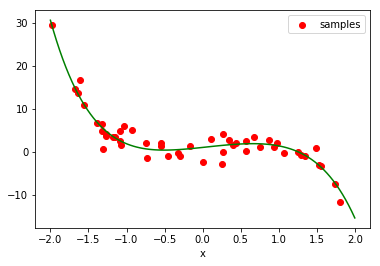

(1, 50)
1


In [9]:
def ArrayToList(array):
    list=[]
    for i in range(len(array)):
        list.append(float(array[i]))
    return list

def paraestimateRobustreg(Phi,sampy,lmb=1):
    m=len(sampy)
    k=len(Phi)
    temp1=np.row_stack((-Phi.T,Phi.T))
    temp2=np.row_stack((-np.eye(m),-np.eye(m)))
    A=np.column_stack((temp1,temp2))
    b=np.row_stack((-sampy,sampy))
    f=np.row_stack((np.zeros((k,1)),np.ones((m,1))))
    X=np.zeros((m+k, 1))
    B=ArrayToList(b)
    fun=lambda x:np.dot(f.T,x)
    cons=({'type': 'ineq', 'fun': lambda x:B-np.dot(A, x)})#B should be list then can get constraint
    x_ans=opt.minimize(fun,X,constraints=cons, method="SLSQP")
    
    theta=x_ans.x[0:k]
    theta=np.expand_dims(theta, axis=1)
    return theta
theta_rr=paraestimateRobustreg(Phi,sampy,lmb=1)
print theta_rr.shape

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_rr[0][0]+theta_rr[1][0]*x+theta_rr[2][0]*np.power(x,2)+theta_rr[3][0]*np.power(x,3)+theta_rr[4][0]*np.power(x,4)+theta_rr[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['sampx'],data1['sampy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
print polyfunc.shape
print len(polyx)

(6, 6)
(6, 1)
(100, 1)
(100, 6)
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-2.00000000e+00 -1.95959596e+00 -1.91919192e+00 -1.87878788e+00
  -1.83838384e+00 -1.79797980e+00]
 [ 4.00000000e+00  3.84001632e+00  3.68329762e+00  3.52984389e+00
   3.37965514e+00  3.23273135e+00]
 [-8.00000000e+00 -7.52488047e+00 -7.06895503e+00 -6.63182792e+00
  -6.21310338e+00 -5.81238567e+00]
 [ 1.60000000e+01  1.47457254e+01  1.35666814e+01  1.24597979e+01
   1.14220688e+01  1.04505520e+01]
 [-3.20000000e+01 -2.88956639e+01 -2.60370653e+01 -2.34093173e+01
  -2.09981468e+01 -1.87898814e+01]
 [ 6.40000000e+01  5.66238262e+01  4.99701253e+01  4.39811416e+01
   3.86026537e+01  3.37838271e+01]
 [-1.28000000e+02 -1.10959821e+02 -9.59022606e+01 -8.26312357e+01
  -7.09664946e+01 -6.07426387e+01]
 [ 2.56000000e+02  2.17436417e+02  1.84054844e+02  1.55246564e+02
   1.30463657e+02  1.09214037e+02]
 [-5.12000000e+02 -4.26087524e+02 -3.53236569e+02 -2.916753

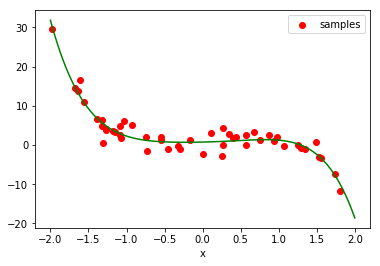

In [10]:
#BR 
#Prestior Sigma
polyX=np.zeros((100,6))
for i in range(100):
    for j in range(6):
        polyX[i][j]=np.power(polyx[0][j],i)
            
            
def esitmatesigma(Phi,alpha=1,sigma_square=5):
    temp=(1/float(sigma_square))*np.dot(Phi,Phi.T)
    m=len(Phi)
    SIGMA=np.linalg.inv(temp+(1/float(alpha))*np.eye(m))
    return SIGMA

def estimatemju(sampy,Phi,SIGMA,sigma_square=5):
    mju=(1/float(sigma_square))*np.dot(np.dot(SIGMA,Phi),sampy)
    return mju

def gaussianpredictedsigma(SIGMA,polyx_l):
    polyphi=np.zeros((1,6))
    for i in range(6):
        polyphi[0][i]=np.power(polyx_l,i)
    res=np.dot(np.dot(polyphi,SIGMA),polyphi.T)
    return res

SIGMA=esitmatesigma(Phi,alpha=1,sigma_square=5)
mju=estimatemju(sampy,Phi,SIGMA,sigma_square=5)
print SIGMA.shape
print mju.shape
sigmapredict=np.zeros((100,1))
for i in range(100):
    sigmapredict[i][0]=gaussianpredictedsigma(SIGMA,polyx[0][i])
print sigmapredict.shape
print polyX.shape
print polyX

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=mju[0][0]+mju[1][0]*x+mju[2][0]*np.power(x,2)+mju[3][0]*np.power(x,3)+mju[4][0]*np.power(x,4)+mju[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['sampx'],data1['sampy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()


0.4086438835698429
0.7680463152279735


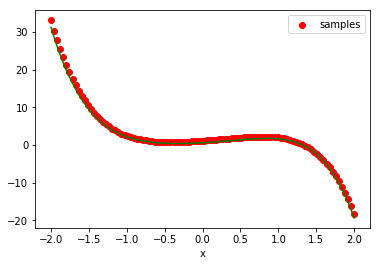

"#LS\ndef lsmse(theta_real,polyx,polyy):\n    \n    x=np.linspace(-2,2,100)\n    y=np.linspace(-20,40,100)\n    f=theta_real[0][0]+theta_real[1][0]*x+theta_real[2][0]*np.power(x,2)+theta_real[3][0]*np.power(x,3)+theta_real[4][0]*np.power(x,4)+theta_real[5][0]*np.power(x,5)\n    fig,ax=plt.subplots()\n    ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')\n    ax.legend()\n    ax.set(xlabel='x')\n    ax.plot(x,f,c='green')\n    plt.show()\n"

In [11]:
####the second part
def meansquareerror(polyy,f_l):
    sum=0
    m=len(polyy)
    for i in range(m):
        error=f_l[i][0]-polyy[i][0]
        sum+=np.power(error,2)
    mse=sum/m
    return mse
f_ls=theta_real[0][0]+theta_real[1][0]*polyx+theta_real[2][0]*np.power(polyx,2)+theta_real[3][0]*np.power(polyx,3)+theta_real[4][0]*np.power(polyx,4)+theta_real[5][0]*np.power(polyx,5)
f_RLS=theta_real_reg[0][0]+theta_real_reg[1][0]*polyx+theta_real_reg[2][0]*np.power(polyx,2)+theta_real_reg[3][0]*np.power(polyx,3)+theta_real_reg[4][0]*np.power(polyx,4)+theta_real_reg[5][0]*np.power(polyx,5)
f_lasso=theta_lasso[0][0]+theta_lasso[1][0]*polyx+theta_lasso[2][0]*np.power(polyx,2)+theta_lasso[3][0]*np.power(polyx,3)+theta_lasso[4][0]*np.power(polyx,4)+theta_lasso[5][0]*np.power(polyx,5)
f_rr=theta_rr[0][0]+theta_rr[1][0]*polyx+theta_rr[2][0]*np.power(polyx,2)+theta_rr[3][0]*np.power(polyx,3)+theta_rr[4][0]*np.power(polyx,4)+theta_rr[5][0]*np.power(polyx,5)

mse_ls=meansquareerror(polyy,f_ls.T)
mse_rls=meansquareerror(polyy,f_RLS.T)
mse_lasso=meansquareerror(polyy,f_lasso.T)
mse_rr=meansquareerror(polyy,f_rr.T)
print mse_ls


print mse_rr

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real[0][0]+theta_real[1][0]*x+theta_real[2][0]*np.power(x,2)+theta_real[3][0]*np.power(x,3)+theta_real[4][0]*np.power(x,4)+theta_real[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()


'''#LS
def lsmse(theta_real,polyx,polyy):
    
    x=np.linspace(-2,2,100)
    y=np.linspace(-20,40,100)
    f=theta_real[0][0]+theta_real[1][0]*x+theta_real[2][0]*np.power(x,2)+theta_real[3][0]*np.power(x,3)+theta_real[4][0]*np.power(x,4)+theta_real[5][0]*np.power(x,5)
    fig,ax=plt.subplots()
    ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
    ax.legend()
    ax.set(xlabel='x')
    ax.plot(x,f,c='green')
    plt.show()
'''



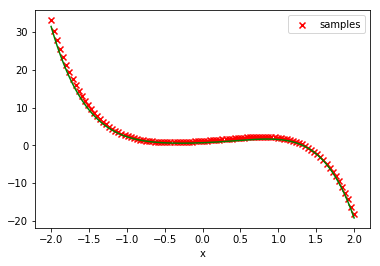

0.40863257088369376


'\n    \ndef MeanSquareError(f_l, polyy):        # mean-square error\n    sum = 0\n    n = len(polyy)\n    for i in range(n):\n        error = f_l[i]-polyy[i]\n        sum += (error**2)\n    avr = sum/n\n    return avr '

In [12]:
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_reg[0][0]+theta_real_reg[1][0]*x+theta_real_reg[2][0]*np.power(x,2)+theta_real_reg[3][0]*np.power(x,3)+theta_real_reg[4][0]*np.power(x,4)+theta_real_reg[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='x',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()  
print mse_rls
'''
    
def MeanSquareError(f_l, polyy):        # mean-square error
    sum = 0
    n = len(polyy)
    for i in range(n):
        error = f_l[i]-polyy[i]
        sum += (error**2)
    avr = sum/n
    return avr '''

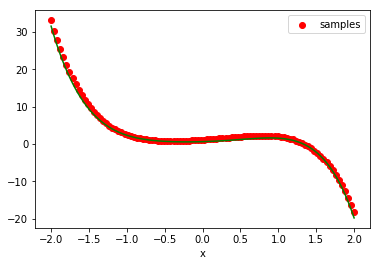

0.4753546180612807


In [13]:
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_lasso[0][0]+theta_lasso[1][0]*x+theta_lasso[2][0]*np.power(x,2)+theta_lasso[3][0]*np.power(x,3)+theta_lasso[4][0]*np.power(x,4)+theta_lasso[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
print mse_lasso

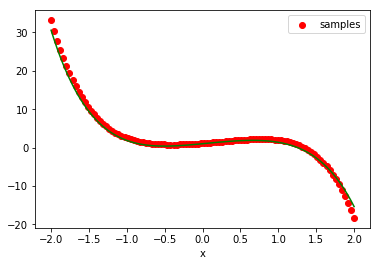

0.7680463152279735


In [14]:
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_rr[0][0]+theta_rr[1][0]*x+theta_rr[2][0]*np.power(x,2)+theta_rr[3][0]*np.power(x,3)+theta_rr[4][0]*np.power(x,4)+theta_rr[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
print mse_rr

0.45915793875299415
(1, 100)


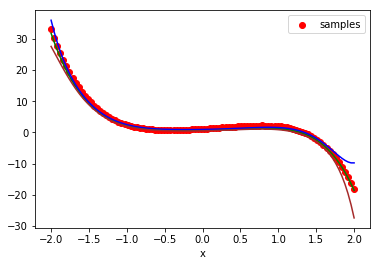

In [15]:
#for BR
def esitmatesigma(Phi,alpha=1,sigma_square=5):
    temp=(1/float(sigma_square))*np.dot(Phi,Phi.T)
    m=len(Phi)
    SIGMA=np.linalg.inv(temp+(1/float(alpha))*np.eye(m))
    return SIGMA

def estimatemju(sampy,Phi,SIGMA,sigma_square=5):
    mju=(1/float(sigma_square))*np.dot(np.dot(SIGMA,Phi),sampy)
    return mju


SIGMA=esitmatesigma(Phi,alpha=1,sigma_square=5)
mju=estimatemju(sampy,Phi,SIGMA,sigma_square=5)
f_BR=mju[0][0]+mju[1][0]*polyx+mju[2][0]*np.power(polyx,2)+mju[3][0]*np.power(polyx,3)+mju[4][0]*np.power(polyx,4)+mju[5][0]*np.power(polyx,5)
mse_BR=meansquareerror(polyy,f_BR.T)
print mse_BR

print f_BR.shape
f_plus=np.zeros((1,100))
f_sub=np.zeros((1,100))
for i in range(100):
    f_plus[0][i]=f_BR[0][i]+sigmapredict.T[0][i]
    f_sub[0][i]=f_BR[0][i]-sigmapredict.T[0][i]

f_plus=f_plus.squeeze()
f_sub=f_sub.squeeze()


 

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=mju[0][0]+mju[1][0]*x+mju[2][0]*np.power(x,2)+mju[3][0]*np.power(x,3)+mju[4][0]*np.power(x,4)+mju[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
ax.plot(x,f_plus,c='blue')
ax.plot(x,f_sub,c='brown')
plt.savefig('test2.jpg',dpi=1600)




In [16]:
#part3

#subset




def randomlist(sampx,sampy,percent,total):
    number=int(percent*0.01*total)
    rlist=np.random.randint(0,total-1,size=number)
    print rlist
    sampx_newtmp=[]
    sampy_newtmp=[]
    for e in rlist:
        sampx_newtmp.append(sampx[0][e])
        sampy_newtmp.append(sampy[e][0])
    sampx_new=np.zeros((1,number))
    sampy_new=np.zeros((number,1))
    for i in range(number):
        sampx_new[0][i]=sampx_newtmp[i]
        sampy_new[i][0]=sampy_newtmp[i]
    m=len(sampx_new[0])
    n=len(thtrue.T[0])
    Phi_new=np.zeros((n,m))
    for j in range(m):
        for i in range(n):
            Phi_new[i][j]=np.power(sampx_new[0][j],i)
    return sampx_new,sampy_new,Phi_new

sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,10,50)
#print sampx_new
#print sampy_new
print Phi_new


[32 27 37 22 29]
[[ 1.          1.          1.          1.          1.        ]
 [-1.31458641  0.97782642 -1.17663724  1.29749965  0.86918266]
 [ 1.72813744  0.9561445   1.38447521  1.68350534  0.75547849]
 [-2.271786    0.93494335 -1.62902509  2.18434759  0.6566488 ]
 [ 2.98645901  0.91421231  1.9167716   2.83419023  0.57074775]
 [-3.92595844  0.89394095 -2.25534485  3.67736082  0.49608404]]


[23 32  5  0 46]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [-9.23400945e-01 -1.31458641e+00 -1.15450337e+00 -1.31701448e+00
  -3.25334386e-01]
 [ 8.52669306e-01  1.72813744e+00  1.33287804e+00  1.73452714e+00
   1.05842463e-01]
 [-7.87355643e-01 -2.27178600e+00 -1.53881220e+00 -2.28439736e+00
  -3.44341927e-02]
 [ 7.27044946e-01  2.98645901e+00  1.77656388e+00  3.00858440e+00
   1.12026269e-02]
 [-6.71353990e-01 -3.92595844e+00 -2.05104899e+00 -3.96234922e+00
  -3.64459976e-03]]
100
860596224345.7578


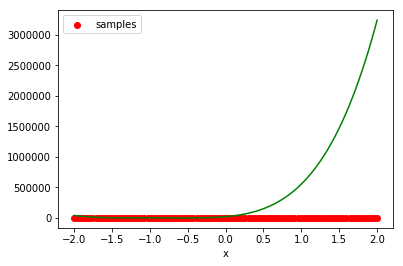

100


In [20]:
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,10,50)
#print sampx_new
#print sampy_new
print Phi_new
print len(polyy)
theta_real_case1=paraestimate(Phi_new,sampy_new)
f_ls=theta_real_case1[0][0]+theta_real_case1[1][0]*polyx+theta_real_case1[2][0]*np.power(polyx,2)+theta_real_case1[3][0]*np.power(polyx,3)+theta_real_case1[4][0]*np.power(polyx,4)+theta_real_case1[5][0]*np.power(polyx,5)
mse_ls=meansquareerror(polyy,f_ls.T)
print mse_ls
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case1[0][0]+theta_real_case1[1][0]*x+theta_real_case1[2][0]*np.power(x,2)+theta_real_case1[3][0]*np.power(x,3)+theta_real_case1[4][0]*np.power(x,4)+theta_real_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
print len(polyy)

[38 47  0 47 23 28 46 46 10 25 35  2]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 2.57823979e-01  1.04972477e-01 -1.31701448e+00  1.04972477e-01
  -9.23400945e-01 -1.67139471e+00 -3.25334386e-01 -3.25334386e-01
   1.06393532e+00  4.31015808e-03 -1.63329075e-01 -1.08750007e+00]
 [ 6.64732040e-02  1.10192210e-02  1.73452714e+00  1.10192210e-02
   8.52669306e-01  2.79356026e+00  1.05842463e-01  1.05842463e-01
   1.13195836e+00  1.85774627e-05  2.66763868e-02  1.18265640e+00]
 [ 1.71383859e-02  1.15671492e-03 -2.28439736e+00  1.15671492e-03
  -7.87355643e-01 -4.66914183e+00 -3.44341927e-02 -3.44341927e-02
   1.20433047e+00  8.00718010e-08 -4.35702958e-03 -1.28613892e+00]
 [ 4.41868685e-03  1.21423230e-04  3.00858440e+00  1.21423230e-04
   7.27044946e-01  7.80397894e+00  1.12026269e-02  1.12026269e-02
   1.28132972e+00  3.45122121e-10 

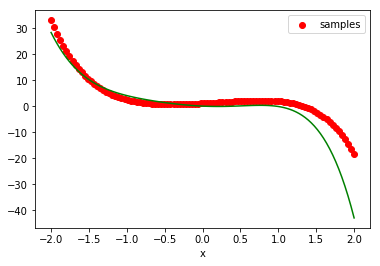

33.55793340714676


In [23]:
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,25,50)
#print sampx_new
#print sampy_new
print Phi_new

theta_real_case1=paraestimate(Phi_new,sampy_new)
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case1[0][0]+theta_real_case1[1][0]*x+theta_real_case1[2][0]*np.power(x,2)+theta_real_case1[3][0]*np.power(x,3)+theta_real_case1[4][0]*np.power(x,4)+theta_real_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_ls=theta_real_case1[0][0]+theta_real_case1[1][0]*polyx+theta_real_case1[2][0]*np.power(polyx,2)+theta_real_case1[3][0]*np.power(polyx,3)+theta_real_case1[4][0]*np.power(polyx,4)+theta_real_case1[5][0]*np.power(polyx,5)
mse_ls=meansquareerror(polyy,f_ls.T)
print mse_ls

[25 41  4  0 47 40 21 25 43 48 25  5 29 16 39  3 46  6 17 13  1 29 24 19
 19]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [ 4.31015808e-03  1.81130910e+00 -1.26644580e+00 -1.31701448e+00
   1.04972477e-01  5.73202315e-01 -7.36044654e-01  4.31015808e-03
  -1.63461874e+00  2.72422954e-01  4.31015808e-03 -1.15450337e+00
   8.69182655e-01  5.73928562e-01  1.24760952e+00 -1.61368873e+00
  -3.25334386e-01  2.61778087e-01 -1.98265409e+00 -7.49171795e-01
   9.37639823e-01  8.69182655e-01  4.00309651e-01 -5.51702074e-01
  -5.51702074e-01]
 [ 1.85774627e-05  3.28084067e+00  1.60388496e+00  1.73452714e+00
   1.10192210e-02  3.28560

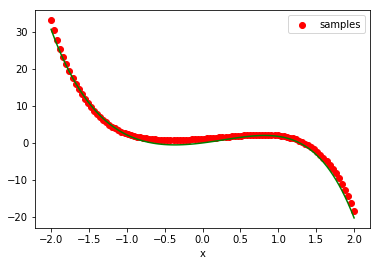

0.9421968282683112


In [26]:
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,50,50)
#print sampx_new
#print sampy_new
print Phi_new

theta_real_case1=paraestimate(Phi_new,sampy_new)
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case1[0][0]+theta_real_case1[1][0]*x+theta_real_case1[2][0]*np.power(x,2)+theta_real_case1[3][0]*np.power(x,3)+theta_real_case1[4][0]*np.power(x,4)+theta_real_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_ls=theta_real_case1[0][0]+theta_real_case1[1][0]*polyx+theta_real_case1[2][0]*np.power(polyx,2)+theta_real_case1[3][0]*np.power(polyx,3)+theta_real_case1[4][0]*np.power(polyx,4)+theta_real_case1[5][0]*np.power(polyx,5)
mse_ls=meansquareerror(polyy,f_ls.T)
print mse_ls

[14  7  8 36 35 16 32 47 39 13 10 32 45 43 22 19 48 41 36 36 35  9 17 13
 25 35 19 14 32 37 11 26 11 23 16 12 34]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [ 6.69645788e-01 -2.95683772e-01 -1.55716341e+00 -1.07176633e+00
  -1.63329075e-01  5.73928562e-01 -1.31458641e+00  1.04972477e-01
   1.24760952e+00 -7.49171795e-01  1.06393532e+00 -1.31458641e+00
   1.34941838e+00 -1.63461874e+00  1.29749965e+00 -5.51702074e-01
   2.7242

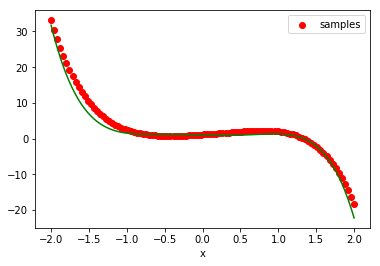

2.527248806966241


In [30]:
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,75,50)
#print sampx_new
#print sampy_new
print Phi_new

theta_real_case1=paraestimate(Phi_new,sampy_new)
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case1[0][0]+theta_real_case1[1][0]*x+theta_real_case1[2][0]*np.power(x,2)+theta_real_case1[3][0]*np.power(x,3)+theta_real_case1[4][0]*np.power(x,4)+theta_real_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_ls=theta_real_case1[0][0]+theta_real_case1[1][0]*polyx+theta_real_case1[2][0]*np.power(polyx,2)+theta_real_case1[3][0]*np.power(polyx,3)+theta_real_case1[4][0]*np.power(polyx,4)+theta_real_case1[5][0]*np.power(polyx,5)
mse_ls=meansquareerror(polyy,f_ls.T)
print mse_ls

[46 32 10  6  9]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [-3.25334386e-01 -1.31458641e+00  1.06393532e+00  2.61778087e-01
   7.54510855e-01]
 [ 1.05842463e-01  1.72813744e+00  1.13195836e+00  6.85277671e-02
   5.69286630e-01]
 [-3.44341927e-02 -2.27178600e+00  1.20433047e+00  1.79390678e-02
   4.29532942e-01]
 [ 1.12026269e-02  2.98645901e+00  1.28132972e+00  4.69605486e-03
   3.24087267e-01]
 [-3.64459976e-03 -3.92595844e+00  1.36325195e+00  1.22932426e-03
   2.44527361e-01]]


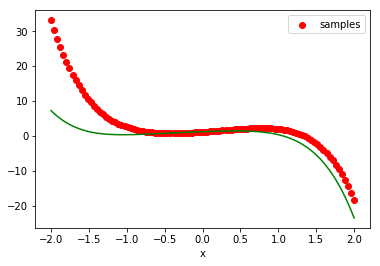

46.522874090329594


In [33]:
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,10,50)
#print sampx_new
#print sampy_new
print Phi_new

theta_real_reg_case1=paraestimateReg(Phi_new,sampy_new,lmb=1)
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_reg_case1[0][0]+theta_real_reg_case1[1][0]*x+theta_real_reg_case1[2][0]*np.power(x,2)+theta_real_reg_case1[3][0]*np.power(x,3)+theta_real_reg_case1[4][0]*np.power(x,4)+theta_real_reg_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lr=theta_real_reg_case1[0][0]+theta_real_reg_case1[1][0]*polyx+theta_real_reg_case1[2][0]*np.power(polyx,2)+theta_real_reg_case1[3][0]*np.power(polyx,3)+theta_real_reg_case1[4][0]*np.power(polyx,4)+theta_real_reg_case1[5][0]*np.power(polyx,5)
mse_lr=meansquareerror(polyy,f_lr.T)
print mse_lr

[36 29 44 37  3  0 11 33 24 20 24 34]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-1.07176633e+00  8.69182655e-01 -1.03710660e+00 -1.17663724e+00
  -1.61368873e+00 -1.31701448e+00  1.56086716e+00  1.74614486e+00
   4.00309651e-01 -4.56758258e-01  4.00309651e-01 -5.43354753e-01]
 [ 1.14868306e+00  7.55478488e-01  1.07559009e+00  1.38447521e+00
   2.60399131e+00  1.73452714e+00  2.43630629e+00  3.04902187e+00
   1.60247817e-01  2.08628106e-01  1.60247817e-01  2.95234387e-01]
 [-1.23111982e+00  6.56648798e-01 -1.11550158e+00 -1.62902509e+00
  -4.20203142e+00 -2.28439736e+00  3.80275047e+00  5.32403386e+00
   6.41487477e-02 -9.52926105e-02  6.41487477e-02 -1.60417008e-01]
 [ 1.31947277e+00  5.70747746e-01  1.15689405e+00  1.91677160e+00
   6.78077074e+00  3.00858440e+00  5.93558832e+00  9.29653436e+00
   2.56793628e-02  4.35256868e-02 

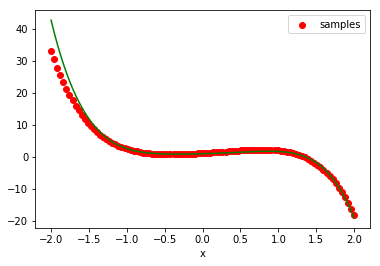

3.958684639837711


In [36]:
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,25,50)
#print sampx_new
#print sampy_new
print Phi_new

theta_real_reg_case1=paraestimateReg(Phi_new,sampy_new,lmb=1)
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_reg_case1[0][0]+theta_real_reg_case1[1][0]*x+theta_real_reg_case1[2][0]*np.power(x,2)+theta_real_reg_case1[3][0]*np.power(x,3)+theta_real_reg_case1[4][0]*np.power(x,4)+theta_real_reg_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lr=theta_real_reg_case1[0][0]+theta_real_reg_case1[1][0]*polyx+theta_real_reg_case1[2][0]*np.power(polyx,2)+theta_real_reg_case1[3][0]*np.power(polyx,3)+theta_real_reg_case1[4][0]*np.power(polyx,4)+theta_real_reg_case1[5][0]*np.power(polyx,5)
mse_lr=meansquareerror(polyy,f_lr.T)
print mse_lr

[28  9 32  1 44 20 11 35 46 15 33 30 41 41  6 42 47 27 29  5 33 30 19 27
 19]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [-1.67139471e+00  7.54510855e-01 -1.31458641e+00  9.37639823e-01
  -1.03710660e+00 -4.56758258e-01  1.56086716e+00 -1.63329075e-01
  -3.25334386e-01 -1.26324901e+00  1.74614486e+00  3.52883614e-01
   1.81130910e+00  1.81130910e+00  2.61778087e-01 -1.32787735e+00
   1.04972477e-01  9.77826418e-01  8.69182655e-01 -1.15450337e+00
   1.74614486e+00  3.52883614e-01 -5.51702074e-01  9.77826418e-01
  -5.51702074e-01]
 [ 2.79356026e+00  5.69286630e-01  1.72813744e+00  8.79168437e-01
   1.07559009e+00  2.08628

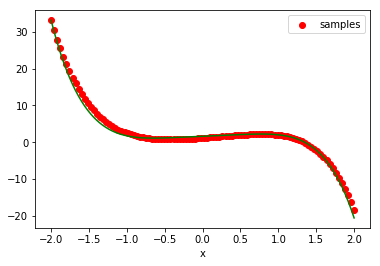

0.8130136098820051


In [39]:
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,50,50)
#print sampx_new
#print sampy_new
print Phi_new

theta_real_reg_case1=paraestimateReg(Phi_new,sampy_new,lmb=1)
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_reg_case1[0][0]+theta_real_reg_case1[1][0]*x+theta_real_reg_case1[2][0]*np.power(x,2)+theta_real_reg_case1[3][0]*np.power(x,3)+theta_real_reg_case1[4][0]*np.power(x,4)+theta_real_reg_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lr=theta_real_reg_case1[0][0]+theta_real_reg_case1[1][0]*polyx+theta_real_reg_case1[2][0]*np.power(polyx,2)+theta_real_reg_case1[3][0]*np.power(polyx,3)+theta_real_reg_case1[4][0]*np.power(polyx,4)+theta_real_reg_case1[5][0]*np.power(polyx,5)
mse_lr=meansquareerror(polyy,f_lr.T)
print mse_lr

[28 43  9 12  7 25 19 10 37 28 19 23 42 35 30 37 31 47 19  5 32 19 47  2
  6 20 28 38 32 20 18 20 44 26 18 19 10]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [-1.67139471e+00 -1.63461874e+00  7.54510855e-01  1.49433277e+00
  -2.95683772e-01  4.31015808e-03 -5.51702074e-01  1.06393532e+00
  -1.17663724e+00 -1.67139471e+00 -5.51702074e-01 -9.23400945e-01
  -1.32787735e+00 -1.63329075e-01  3.52883614e-01 -1.17663724e+00
  -1.0851

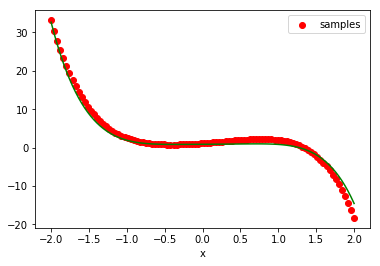

1.322816688208014


In [42]:
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,75,50)
#print sampx_new
#print sampy_new
print Phi_new

theta_real_reg_case1=paraestimateReg(Phi_new,sampy_new,lmb=1)
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_reg_case1[0][0]+theta_real_reg_case1[1][0]*x+theta_real_reg_case1[2][0]*np.power(x,2)+theta_real_reg_case1[3][0]*np.power(x,3)+theta_real_reg_case1[4][0]*np.power(x,4)+theta_real_reg_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()

f_lr=theta_real_reg_case1[0][0]+theta_real_reg_case1[1][0]*polyx+theta_real_reg_case1[2][0]*np.power(polyx,2)+theta_real_reg_case1[3][0]*np.power(polyx,3)+theta_real_reg_case1[4][0]*np.power(polyx,4)+theta_real_reg_case1[5][0]*np.power(polyx,5)
mse_lr=meansquareerror(polyy,f_lr.T)
print mse_lr

[38 21 20 20 29]
[[ 5.         -0.52255454  1.78096964  0.08444114  0.95572358  0.24142849
  -5.          0.52255454 -1.78096964 -0.08444114 -0.95572358 -0.24142849]
 [-0.52255454  1.78096964  0.08444114  0.95572358  0.24142849  0.60865293
   0.52255454 -1.78096964 -0.08444114 -0.95572358 -0.24142849 -0.60865293]
 [ 1.78096964  0.08444114  0.95572358  0.24142849  0.60865293  0.24952259
  -1.78096964 -0.08444114 -0.95572358 -0.24142849 -0.60865293 -0.24952259]
 [ 0.08444114  0.95572358  0.24142849  0.60865293  0.24952259  0.41570712
  -0.08444114 -0.95572358 -0.24142849 -0.60865293 -0.24952259 -0.41570712]
 [ 0.95572358  0.24142849  0.60865293  0.24952259  0.41570712  0.2180062
  -0.95572358 -0.24142849 -0.60865293 -0.24952259 -0.41570712 -0.2180062 ]
 [ 0.24142849  0.60865293  0.24952259  0.41570712  0.2180062   0.29356157
  -0.24142849 -0.60865293 -0.24952259 -0.41570712 -0.2180062  -0.29356157]
 [-5.          0.52255454 -1.78096964 -0.08444114 -0.95572358 -0.24142849
   5.         -0

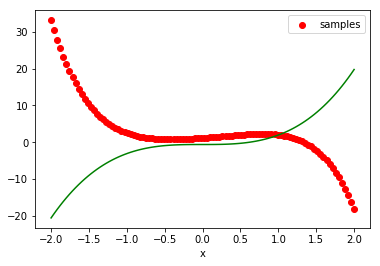

270.3402156118475


In [45]:
#Lasso
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,10,50)
#print sampx_new
#print sampy_new
theta_lasso_case1=paraestimateLasso(Phi_new,sampy_new,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_lasso_case1[0][0]+theta_lasso_case1[1][0]*x+theta_lasso_case1[2][0]*np.power(x,2)+theta_lasso_case1[3][0]*np.power(x,3)+theta_lasso_case1[4][0]*np.power(x,4)+theta_lasso_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lasso=theta_lasso_case1[0][0]+theta_lasso_case1[1][0]*polyx+theta_lasso_case1[2][0]*np.power(polyx,2)+theta_lasso_case1[3][0]*np.power(polyx,3)+theta_lasso_case1[4][0]*np.power(polyx,4)+theta_lasso_case1[5][0]*np.power(polyx,5)
mse_lasso=meansquareerror(polyy,f_lasso.T)
print mse_lasso

[33  5  8 44 19 20 17 22  3 26  6  8]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.74614486e+00 -1.15450337e+00 -1.55716341e+00 -1.03710660e+00
  -5.51702074e-01 -4.56758258e-01 -1.98265409e+00  1.29749965e+00
  -1.61368873e+00  4.40826907e-01  2.61778087e-01 -1.55716341e+00]
 [ 3.04902187e+00  1.33287804e+00  2.42475790e+00  1.07559009e+00
   3.04375178e-01  2.08628106e-01  3.93091725e+00  1.68350534e+00
   2.60399131e+00  1.94328362e-01  6.85277671e-02  2.42475790e+00]
 [ 5.32403386e+00 -1.53881220e+00 -3.77574428e+00 -1.11550158e+00
  -1.67924417e-01 -9.52926105e-02 -7.79364918e+00  2.18434759e+00
  -4.20203142e+00  8.56651708e-02  1.79390678e-02 -3.77574428e+00]
 [ 9.29653436e+00  1.77656388e+00  5.87945085e+00  1.15689405e+00
   9.26442493e-02  4.35256868e-02  1.54521104e+01  2.83419023e+00
   6.78077074e+00  3.77635123e-02 

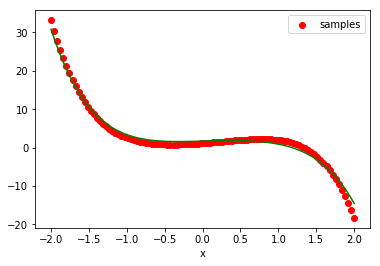

1.0257024988453387


In [48]:
#Lasso
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,25,50)
#print sampx_new
#print sampy_new
print Phi_new
theta_lasso_case1=paraestimateLasso(Phi_new,sampy_new,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_lasso_case1[0][0]+theta_lasso_case1[1][0]*x+theta_lasso_case1[2][0]*np.power(x,2)+theta_lasso_case1[3][0]*np.power(x,3)+theta_lasso_case1[4][0]*np.power(x,4)+theta_lasso_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lasso=theta_lasso_case1[0][0]+theta_lasso_case1[1][0]*polyx+theta_lasso_case1[2][0]*np.power(polyx,2)+theta_lasso_case1[3][0]*np.power(polyx,3)+theta_lasso_case1[4][0]*np.power(polyx,4)+theta_lasso_case1[5][0]*np.power(polyx,5)
mse_lasso=meansquareerror(polyy,f_lasso.T)
print mse_lasso

[ 0  7 29 42 48 26 48 13 48 34 10 41 22 47 48 12 32 12  3 22 35 19 21  6
 44]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [-1.31701448e+00 -2.95683772e-01  8.69182655e-01 -1.32787735e+00
   2.72422954e-01  4.40826907e-01  2.72422954e-01 -7.49171795e-01
   2.72422954e-01 -5.43354753e-01  1.06393532e+00  1.81130910e+00
   1.29749965e+00  1.04972477e-01  2.72422954e-01  1.49433277e+00
  -1.31458641e+00  1.49433277e+00 -1.61368873e+00  1.29749965e+00
  -1.63329075e-01 -5.51702074e-01 -7.36044654e-01  2.61778087e-01
  -1.03710660e+00]
 [ 1.73452714e+00  8.74288933e-02  7.55478488e-01  1.76325826e+00
   7.42142657e-02  1.94328

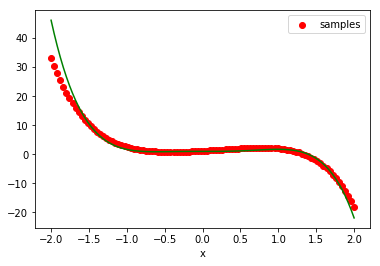

6.174393533708821


In [51]:
#Lasso
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,50,50)
#print sampx_new
#print sampy_new
print Phi_new
theta_lasso_case1=paraestimateLasso(Phi_new,sampy_new,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_lasso_case1[0][0]+theta_lasso_case1[1][0]*x+theta_lasso_case1[2][0]*np.power(x,2)+theta_lasso_case1[3][0]*np.power(x,3)+theta_lasso_case1[4][0]*np.power(x,4)+theta_lasso_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lasso=theta_lasso_case1[0][0]+theta_lasso_case1[1][0]*polyx+theta_lasso_case1[2][0]*np.power(polyx,2)+theta_lasso_case1[3][0]*np.power(polyx,3)+theta_lasso_case1[4][0]*np.power(polyx,4)+theta_lasso_case1[5][0]*np.power(polyx,5)
mse_lasso=meansquareerror(polyy,f_lasso.T)
print mse_lasso

[ 7 17 44 36 39 18 11 10  7 13 25 13 42 30 20 41 45 39 13 16 39 17 31  6
 42 30 26 26 31 23 40 20 24  9  8  2 34]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [-2.95683772e-01 -1.98265409e+00 -1.03710660e+00 -1.07176633e+00
   1.24760952e+00  1.53266188e+00  1.56086716e+00  1.06393532e+00
  -2.95683772e-01 -7.49171795e-01  4.31015808e-03 -7.49171795e-01
  -1.32787735e+00  3.52883614e-01 -4.56758258e-01  1.81130910e+00
   1.3494

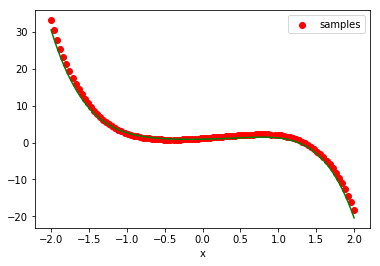

0.8625807237990073


In [54]:
#Lasso
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,75,50)
#print sampx_new
#print sampy_new
print Phi_new
theta_lasso_case1=paraestimateLasso(Phi_new,sampy_new,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_lasso_case1[0][0]+theta_lasso_case1[1][0]*x+theta_lasso_case1[2][0]*np.power(x,2)+theta_lasso_case1[3][0]*np.power(x,3)+theta_lasso_case1[4][0]*np.power(x,4)+theta_lasso_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lasso=theta_lasso_case1[0][0]+theta_lasso_case1[1][0]*polyx+theta_lasso_case1[2][0]*np.power(polyx,2)+theta_lasso_case1[3][0]*np.power(polyx,3)+theta_lasso_case1[4][0]*np.power(polyx,4)+theta_lasso_case1[5][0]*np.power(polyx,5)
mse_lasso=meansquareerror(polyy,f_lasso.T)
print mse_lasso

In [55]:
##RR
print len(sampy)
print len(Phi)

50
6


[11 14  7 34 39]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [ 1.56086716e+00  6.69645788e-01 -2.95683772e-01 -5.43354753e-01
   1.24760952e+00]
 [ 2.43630629e+00  4.48425481e-01  8.74288933e-02  2.95234387e-01
   1.55652951e+00]
 [ 3.80275047e+00  3.00286234e-01 -2.58513050e-02 -1.60417008e-01
   1.94194104e+00]
 [ 5.93558832e+00  2.01085412e-01  7.64381138e-03  8.71633435e-02
   2.42278413e+00]
 [ 9.26466488e+00  1.34655999e-01 -2.26015098e-03 -4.73606169e-02
   3.02268854e+00]]


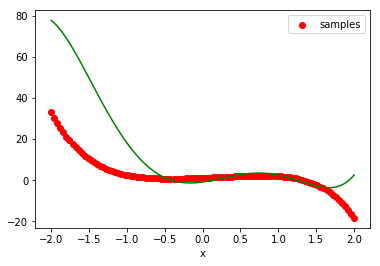

387.5332475861368


In [58]:
#RR
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,10,50)
#print sampx_new
#print sampy_new
print Phi_new
theta_rr_case1=paraestimateRobustreg(Phi_new,sampy_new,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_rr_case1[0][0]+theta_rr_case1[1][0]*x+theta_rr_case1[2][0]*np.power(x,2)+theta_rr_case1[3][0]*np.power(x,3)+theta_rr_case1[4][0]*np.power(x,4)+theta_rr_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_rr=theta_rr_case1[0][0]+theta_rr_case1[1][0]*polyx+theta_rr_case1[2][0]*np.power(polyx,2)+theta_rr_case1[3][0]*np.power(polyx,3)+theta_rr_case1[4][0]*np.power(polyx,4)+theta_rr_case1[5][0]*np.power(polyx,5)
mse_rr=meansquareerror(polyy,f_rr.T)
print mse_rr

[33  9 18 27 31 25  7 25 19  4 29  1]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.74614486e+00  7.54510855e-01  1.53266188e+00  9.77826418e-01
  -1.08510231e+00  4.31015808e-03 -2.95683772e-01  4.31015808e-03
  -5.51702074e-01 -1.26644580e+00  8.69182655e-01  9.37639823e-01]
 [ 3.04902187e+00  5.69286630e-01  2.34905245e+00  9.56144504e-01
   1.17744703e+00  1.85774627e-05  8.74288933e-02  1.85774627e-05
   3.04375178e-01  1.60388496e+00  7.55478488e-01  8.79168437e-01]
 [ 5.32403386e+00  4.29532942e-01  3.60030316e+00  9.34943355e-01
  -1.27765050e+00  8.00718010e-08 -2.58513050e-02  8.00718010e-08
  -1.67924417e-01 -2.03123336e+00  6.56648798e-01  8.24343337e-01]
 [ 9.29653436e+00  3.24087267e-01  5.51804743e+00  9.14212312e-01
   1.38638151e+00  3.45122121e-10  7.64381138e-03  3.45122121e-10
   9.26442493e-02  2.57244695e+00 

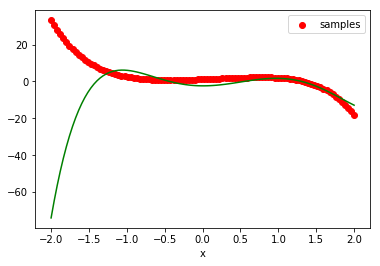

490.1939009447735


In [61]:
#RR
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,25,50)
#print sampx_new
#print sampy_new
print Phi_new
theta_rr_case1=paraestimateRobustreg(Phi_new,sampy_new,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_rr_case1[0][0]+theta_rr_case1[1][0]*x+theta_rr_case1[2][0]*np.power(x,2)+theta_rr_case1[3][0]*np.power(x,3)+theta_rr_case1[4][0]*np.power(x,4)+theta_rr_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_rr=theta_rr_case1[0][0]+theta_rr_case1[1][0]*polyx+theta_rr_case1[2][0]*np.power(polyx,2)+theta_rr_case1[3][0]*np.power(polyx,3)+theta_rr_case1[4][0]*np.power(polyx,4)+theta_rr_case1[5][0]*np.power(polyx,5)
mse_rr=meansquareerror(polyy,f_rr.T)
print mse_rr

[ 1 47  9 10 26 11 42 20 21 13 19 44 48 34 41 21 20  8 29 15 12 26 36 20
  3]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [ 9.37639823e-01  1.04972477e-01  7.54510855e-01  1.06393532e+00
   4.40826907e-01  1.56086716e+00 -1.32787735e+00 -4.56758258e-01
  -7.36044654e-01 -7.49171795e-01 -5.51702074e-01 -1.03710660e+00
   2.72422954e-01 -5.43354753e-01  1.81130910e+00 -7.36044654e-01
  -4.56758258e-01 -1.55716341e+00  8.69182655e-01 -1.26324901e+00
   1.49433277e+00  4.40826907e-01 -1.07176633e+00 -4.56758258e-01
  -1.61368873e+00]
 [ 8.79168437e-01  1.10192210e-02  5.69286630e-01  1.13195836e+00
   1.94328362e-01  2.43630

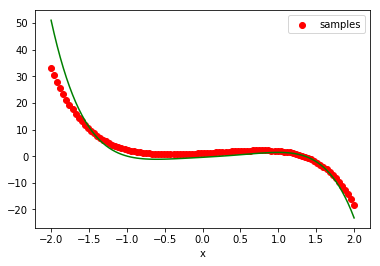

14.106458329613808


In [64]:
#RR
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,50,50)
#print sampx_new
#print sampy_new
print Phi_new
theta_rr_case1=paraestimateRobustreg(Phi_new,sampy_new,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_rr_case1[0][0]+theta_rr_case1[1][0]*x+theta_rr_case1[2][0]*np.power(x,2)+theta_rr_case1[3][0]*np.power(x,3)+theta_rr_case1[4][0]*np.power(x,4)+theta_rr_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_rr=theta_rr_case1[0][0]+theta_rr_case1[1][0]*polyx+theta_rr_case1[2][0]*np.power(polyx,2)+theta_rr_case1[3][0]*np.power(polyx,3)+theta_rr_case1[4][0]*np.power(polyx,4)+theta_rr_case1[5][0]*np.power(polyx,5)
mse_rr=meansquareerror(polyy,f_rr.T)
print mse_rr

[43 22 48 13 23 24 11 20 44 24 13 12 11  0 18 46 19  2  8 34 41 22 35 26
  6 29 25 13 33 47  0  7 34 42 20  1 23]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]
 [-1.63461874e+00  1.29749965e+00  2.72422954e-01 -7.49171795e-01
  -9.23400945e-01  4.00309651e-01  1.56086716e+00 -4.56758258e-01
  -1.03710660e+00  4.00309651e-01 -7.49171795e-01  1.49433277e+00
   1.56086716e+00 -1.31701448e+00  1.53266188e+00 -3.25334386e-01
  -5.5170

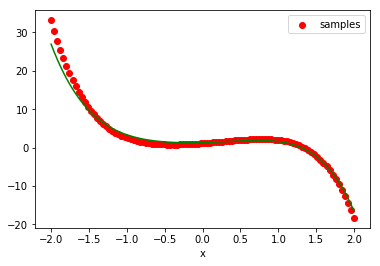

1.8312223770389613
100


In [67]:
#RR
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,75,50)
#print sampx_new
#print sampy_new
print Phi_new
theta_rr_case1=paraestimateRobustreg(Phi_new,sampy_new,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_rr_case1[0][0]+theta_rr_case1[1][0]*x+theta_rr_case1[2][0]*np.power(x,2)+theta_rr_case1[3][0]*np.power(x,3)+theta_rr_case1[4][0]*np.power(x,4)+theta_rr_case1[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_rr=theta_rr_case1[0][0]+theta_rr_case1[1][0]*polyx+theta_rr_case1[2][0]*np.power(polyx,2)+theta_rr_case1[3][0]*np.power(polyx,3)+theta_rr_case1[4][0]*np.power(polyx,4)+theta_rr_case1[5][0]*np.power(polyx,5)
mse_rr=meansquareerror(polyy,f_rr.T)
print mse_rr
print len(polyy)

[11 16 13 32  0]
(6, 6)
(6, 1)
(100, 1)
17.211195077540776


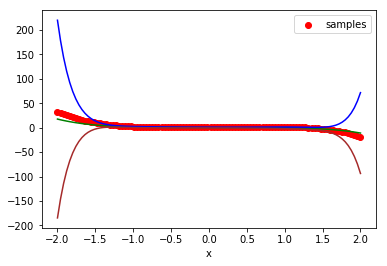

In [68]:
#BR
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,10,50)
SIGMA=esitmatesigma(Phi_new,alpha=1,sigma_square=5)
mju=estimatemju(sampy_new,Phi_new,SIGMA,sigma_square=5)
print SIGMA.shape
print mju.shape
sigmapredict=np.zeros((100,1))
for i in range(100):
    sigmapredict[i][0]=gaussianpredictedsigma(SIGMA,polyx[0][i])
print sigmapredict.shape


f_BR_case1=mju[0][0]+mju[1][0]*polyx+mju[2][0]*np.power(polyx,2)+mju[3][0]*np.power(polyx,3)+mju[4][0]*np.power(polyx,4)+mju[5][0]*np.power(polyx,5)
mse_BR_case1=meansquareerror(polyy,f_BR_case1.T)
print mse_BR_case1

f_plus=np.zeros((1,len(polyy)))
f_sub=np.zeros((1,len(polyy)))
for i in range(len(polyy)):
    f_plus[0][i]=f_BR_case1[0][i]+sigmapredict.T[0][i]
    f_sub[0][i]=f_BR_case1[0][i]-sigmapredict.T[0][i]

f_plus=f_plus.squeeze()
f_sub=f_sub.squeeze()


 

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=mju[0][0]+mju[1][0]*x+mju[2][0]*np.power(x,2)+mju[3][0]*np.power(x,3)+mju[4][0]*np.power(x,4)+mju[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
ax.plot(x,f_plus,c='blue')
ax.plot(x,f_sub,c='brown')
plt.show()

[19 14 24  8 17 35 46  8 43 35 43  2]
(6, 6)
(6, 1)
(100, 1)
8.262447752826247


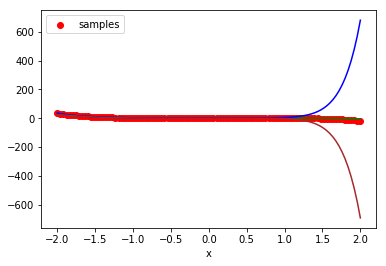

In [74]:
#BR
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,25,50)
SIGMA=esitmatesigma(Phi_new,alpha=1,sigma_square=5)
mju=estimatemju(sampy_new,Phi_new,SIGMA,sigma_square=5)
print SIGMA.shape
print mju.shape
sigmapredict=np.zeros((100,1))
for i in range(100):
    sigmapredict[i][0]=gaussianpredictedsigma(SIGMA,polyx[0][i])
print sigmapredict.shape


f_BR_case1=mju[0][0]+mju[1][0]*polyx+mju[2][0]*np.power(polyx,2)+mju[3][0]*np.power(polyx,3)+mju[4][0]*np.power(polyx,4)+mju[5][0]*np.power(polyx,5)
mse_BR_case1=meansquareerror(polyy,f_BR_case1.T)
print mse_BR_case1

f_plus=np.zeros((1,len(polyy)))
f_sub=np.zeros((1,len(polyy)))
for i in range(len(polyy)):
    f_plus[0][i]=f_BR_case1[0][i]+sigmapredict.T[0][i]
    f_sub[0][i]=f_BR_case1[0][i]-sigmapredict.T[0][i]

f_plus=f_plus.squeeze()
f_sub=f_sub.squeeze()


 

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=mju[0][0]+mju[1][0]*x+mju[2][0]*np.power(x,2)+mju[3][0]*np.power(x,3)+mju[4][0]*np.power(x,4)+mju[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
ax.plot(x,f_plus,c='blue')
ax.plot(x,f_sub,c='brown')
plt.show()

[32  4 19 10 21 31 19 11 22  4 27 42 39 47 34 28 46 44 23 13 47  0 10 11
 24]
(6, 6)
(6, 1)
(100, 1)
1.8531260214933516


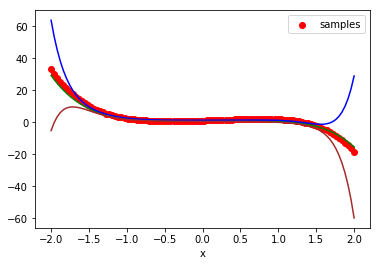

In [77]:
#BR
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,50,50)
SIGMA=esitmatesigma(Phi_new,alpha=1,sigma_square=5)
mju=estimatemju(sampy_new,Phi_new,SIGMA,sigma_square=5)
print SIGMA.shape
print mju.shape
sigmapredict=np.zeros((100,1))
for i in range(100):
    sigmapredict[i][0]=gaussianpredictedsigma(SIGMA,polyx[0][i])
print sigmapredict.shape


f_BR_case1=mju[0][0]+mju[1][0]*polyx+mju[2][0]*np.power(polyx,2)+mju[3][0]*np.power(polyx,3)+mju[4][0]*np.power(polyx,4)+mju[5][0]*np.power(polyx,5)
mse_BR_case1=meansquareerror(polyy,f_BR_case1.T)
print mse_BR_case1

f_plus=np.zeros((1,len(polyy)))
f_sub=np.zeros((1,len(polyy)))
for i in range(len(polyy)):
    f_plus[0][i]=f_BR_case1[0][i]+sigmapredict.T[0][i]
    f_sub[0][i]=f_BR_case1[0][i]-sigmapredict.T[0][i]

f_plus=f_plus.squeeze()
f_sub=f_sub.squeeze()


 

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=mju[0][0]+mju[1][0]*x+mju[2][0]*np.power(x,2)+mju[3][0]*np.power(x,3)+mju[4][0]*np.power(x,4)+mju[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
ax.plot(x,f_plus,c='blue')
ax.plot(x,f_sub,c='brown')
plt.show()

[37 42 13 38  9 47  2 11 40 47 27 42 28 46 47  6  7 19  5 32  0 37 25  5
  5 18 38 44  4 25 34  0 41 25 36 33 13]
(6, 6)
(6, 1)
(100, 1)
1.194226639272435


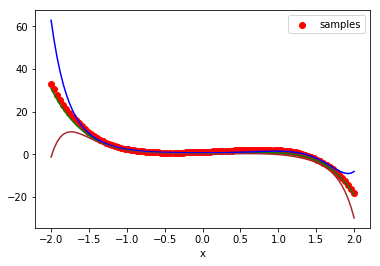

In [80]:
#BR
sampx_new,sampy_new,Phi_new=randomlist(sampx,sampy,75,50)
SIGMA=esitmatesigma(Phi_new,alpha=1,sigma_square=5)
mju=estimatemju(sampy_new,Phi_new,SIGMA,sigma_square=5)
print SIGMA.shape
print mju.shape
sigmapredict=np.zeros((100,1))
for i in range(100):
    sigmapredict[i][0]=gaussianpredictedsigma(SIGMA,polyx[0][i])
print sigmapredict.shape


f_BR_case1=mju[0][0]+mju[1][0]*polyx+mju[2][0]*np.power(polyx,2)+mju[3][0]*np.power(polyx,3)+mju[4][0]*np.power(polyx,4)+mju[5][0]*np.power(polyx,5)
mse_BR_case1=meansquareerror(polyy,f_BR_case1.T)
print mse_BR_case1

f_plus=np.zeros((1,len(polyy)))
f_sub=np.zeros((1,len(polyy)))
for i in range(len(polyy)):
    f_plus[0][i]=f_BR_case1[0][i]+sigmapredict.T[0][i]
    f_sub[0][i]=f_BR_case1[0][i]-sigmapredict.T[0][i]

f_plus=f_plus.squeeze()
f_sub=f_sub.squeeze()


 

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=mju[0][0]+mju[1][0]*x+mju[2][0]*np.power(x,2)+mju[3][0]*np.power(x,3)+mju[4][0]*np.power(x,4)+mju[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
ax.plot(x,f_plus,c='blue')
ax.plot(x,f_sub,c='brown')
plt.show()

In [81]:
#part4
sampxp4=sampx
sampyp4=sampy
sampyp4[25][0]=500
print sampxp4.shape
print sampyp4.shape

(1, 50)
(50, 1)


472.460750929855


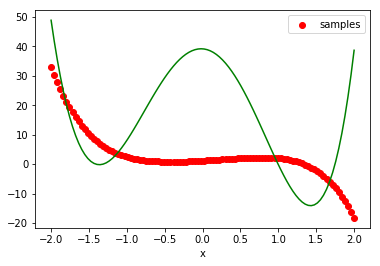

In [82]:
theta_real_case2=paraestimate(Phi,sampyp4)
f_ls_4=theta_real_case2[0][0]+theta_real_case2[1][0]*polyx+theta_real_case2[2][0]*np.power(polyx,2)+theta_real_case2[3][0]*np.power(polyx,3)+theta_real_case2[4][0]*np.power(polyx,4)+theta_real_case2[5][0]*np.power(polyx,5)
mse_ls_4=meansquareerror(polyy,f_ls_4.T)
print mse_ls_4
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case2[0][0]+theta_real_case2[1][0]*x+theta_real_case2[2][0]*np.power(x,2)+theta_real_case2[3][0]*np.power(x,3)+theta_real_case2[4][0]*np.power(x,4)+theta_real_case2[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()

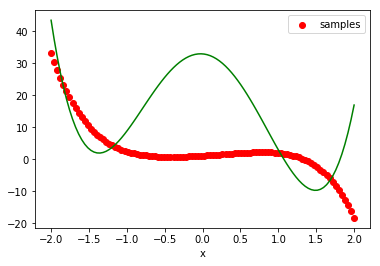

307.9249034926328


In [83]:
theta_real_reg_case2=paraestimateReg(Phi,sampyp4,lmb=1)
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_reg_case2[0][0]+theta_real_reg_case2[1][0]*x+theta_real_reg_case2[2][0]*np.power(x,2)+theta_real_reg_case2[3][0]*np.power(x,3)+theta_real_reg_case2[4][0]*np.power(x,4)+theta_real_reg_case2[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lr_p4=theta_real_reg_case2[0][0]+theta_real_reg_case2[1][0]*polyx+theta_real_reg_case2[2][0]*np.power(polyx,2)+theta_real_reg_case2[3][0]*np.power(polyx,3)+theta_real_reg_case2[4][0]*np.power(polyx,4)+theta_real_reg_case2[5][0]*np.power(polyx,5)
mse_lr_p4=meansquareerror(polyy,f_lr_p4.T)
print mse_lr_p4

[[   50.            -7.13846373    59.56833439   -15.02897815
    120.96530399   -34.17811531   -50.             7.13846373
    -59.56833439    15.02897815  -120.96530399    34.17811531]
 [   -7.13846373    59.56833439   -15.02897815   120.96530399
    -34.17811531   297.39820191     7.13846373   -59.56833439
     15.02897815  -120.96530399    34.17811531  -297.39820191]
 [   59.56833439   -15.02897815   120.96530399   -34.17811531
    297.39820191   -97.89296838   -59.56833439    15.02897815
   -120.96530399    34.17811531  -297.39820191    97.89296838]
 [  -15.02897815   120.96530399   -34.17811531   297.39820191
    -97.89296838   821.47877846    15.02897815  -120.96530399
     34.17811531  -297.39820191    97.89296838  -821.47877846]
 [  120.96530399   -34.17811531   297.39820191   -97.89296838
    821.47877846  -339.00343069  -120.96530399    34.17811531
   -297.39820191    97.89296838  -821.47877846   339.00343069]
 [  -34.17811531   297.39820191   -97.89296838   821.47877846
   

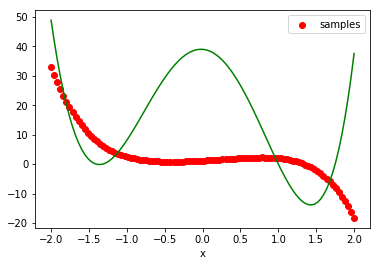

465.0057798662911


In [84]:
theta_lasso_case2=paraestimateLasso(Phi,sampyp4,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_lasso_case2[0][0]+theta_lasso_case2[1][0]*x+theta_lasso_case2[2][0]*np.power(x,2)+theta_lasso_case2[3][0]*np.power(x,3)+theta_lasso_case2[4][0]*np.power(x,4)+theta_lasso_case2[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_lasso_p4=theta_lasso_case2[0][0]+theta_lasso_case2[1][0]*polyx+theta_lasso_case2[2][0]*np.power(polyx,2)+theta_lasso_case2[3][0]*np.power(polyx,3)+theta_lasso_case2[4][0]*np.power(polyx,4)+theta_lasso_case2[5][0]*np.power(polyx,5)
mse_lasso_p4=meansquareerror(polyy,f_lasso_p4.T)
print mse_lasso_p4

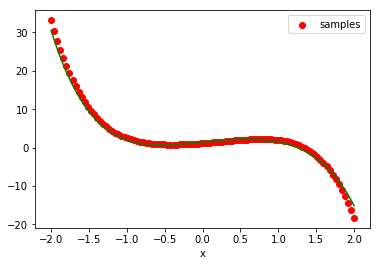

0.7616618477672707


In [85]:
theta_rr_case2=paraestimateRobustreg(Phi,sampyp4,lmb=1)

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_rr_case2[0][0]+theta_rr_case2[1][0]*x+theta_rr_case2[2][0]*np.power(x,2)+theta_rr_case2[3][0]*np.power(x,3)+theta_rr_case2[4][0]*np.power(x,4)+theta_rr_case2[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()
f_rr_p4=theta_rr_case2[0][0]+theta_rr_case2[1][0]*polyx+theta_rr_case2[2][0]*np.power(polyx,2)+theta_rr_case2[3][0]*np.power(polyx,3)+theta_rr_case2[4][0]*np.power(polyx,4)+theta_rr_case2[5][0]*np.power(polyx,5)
mse_rr_p4=meansquareerror(polyy,f_rr_p4.T)
print mse_rr_p4

(100, 1)
133.0217481849858


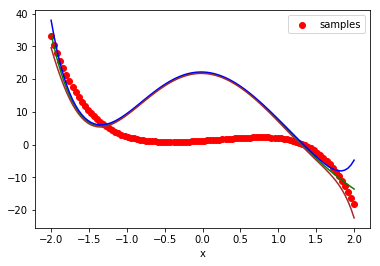

In [86]:
#BR

SIGMA=esitmatesigma(Phi,alpha=1,sigma_square=5)
mju_p4=estimatemju(sampyp4,Phi,SIGMA,sigma_square=5)
sigmapredict=np.zeros((100,1))
for i in range(100):
    sigmapredict[i][0]=gaussianpredictedsigma(SIGMA,polyx[0][i])
print sigmapredict.shape


f_BR_case2=mju_p4[0][0]+mju_p4[1][0]*polyx+mju_p4[2][0]*np.power(polyx,2)+mju_p4[3][0]*np.power(polyx,3)+mju_p4[4][0]*np.power(polyx,4)+mju_p4[5][0]*np.power(polyx,5)
mse_BR_case2=meansquareerror(polyy,f_BR_case2.T)
print mse_BR_case2

f_plus=np.zeros((1,len(polyy)))
f_sub=np.zeros((1,len(polyy)))
for i in range(len(polyy)):
    f_plus[0][i]=f_BR_case2[0][i]+sigmapredict.T[0][i]
    f_sub[0][i]=f_BR_case2[0][i]-sigmapredict.T[0][i]

f_plus=f_plus.squeeze()
f_sub=f_sub.squeeze()


 

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=mju_p4[0][0]+mju_p4[1][0]*x+mju_p4[2][0]*np.power(x,2)+mju_p4[3][0]*np.power(x,3)+mju_p4[4][0]*np.power(x,4)+mju_p4[5][0]*np.power(x,5)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
ax.plot(x,f_plus,c='blue')
ax.plot(x,f_sub,c='brown')
plt.show()

-2.405230446884796
(11, 50)
7.983106593183047


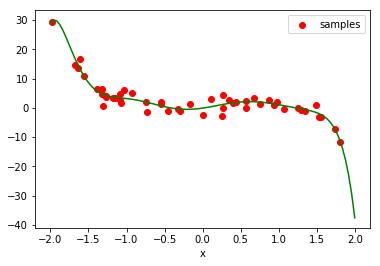

In [90]:
##Part5
#for 10th polynominal
data1=sio.loadmat('PA_1_matlab/poly_data.mat')
sampx=data1['sampx']
sampy=data1['sampy']
polyy=data1['polyy']
polyx=data1['polyx']
thtrue=data1['thtrue']
print sampy[25][0]
def tenpolyfunc(sampx):
    m=len(sampx[0])
    X=np.zeros((11,m))
    for j in range(m):
        for i in range(11):
            X[i][j]=np.power(sampx[0][j],i)
    print X.shape
    return X
tenPhi=tenpolyfunc(sampx)
theta_real_case2=paraestimate(tenPhi,sampy)
f_ls_5=theta_real_case2[0][0]+theta_real_case2[1][0]*polyx+theta_real_case2[2][0]*np.power(polyx,2)+theta_real_case2[3][0]*np.power(polyx,3)+theta_real_case2[4][0]*np.power(polyx,4)+theta_real_case2[5][0]*np.power(polyx,5)+theta_real_case2[6][0]*np.power(polyx,6)+theta_real_case2[7][0]*np.power(polyx,7)+theta_real_case2[8][0]*np.power(polyx,8)+theta_real_case2[9][0]*np.power(polyx,9)+theta_real_case2[10][0]*np.power(polyx,10)
mse_ls_5=meansquareerror(polyy,f_ls_5.T)
print mse_ls_5
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case2[0][0]+theta_real_case2[1][0]*x+theta_real_case2[2][0]*np.power(x,2)+theta_real_case2[3][0]*np.power(x,3)+theta_real_case2[4][0]*np.power(x,4)+theta_real_case2[5][0]*np.power(x,5)+theta_real_case2[6][0]*np.power(x,6)+theta_real_case2[7][0]*np.power(x,7)+theta_real_case2[8][0]*np.power(x,8)+theta_real_case2[9][0]*np.power(x,9)+theta_real_case2[10][0]*np.power(x,10)
fig,ax=plt.subplots()
ax.scatter(data1['sampx'],data1['sampy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()

6.548096165261825


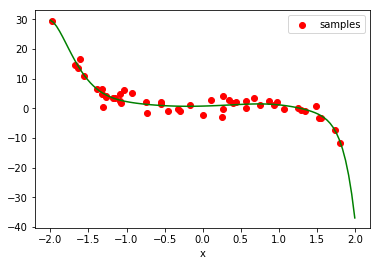

In [91]:
##LR
def paraestimateReg(Phi,sampy,lmb=1):
    A=np.linalg.inv(np.dot(Phi,Phi.T)+lmb*np.eye(11))
    theta_ls=np.dot(np.dot(A,Phi),sampy)
    return theta_ls
theta_real_case2=paraestimateReg(tenPhi,sampy)
f_ls_5=theta_real_case2[0][0]+theta_real_case2[1][0]*polyx+theta_real_case2[2][0]*np.power(polyx,2)+theta_real_case2[3][0]*np.power(polyx,3)+theta_real_case2[4][0]*np.power(polyx,4)+theta_real_case2[5][0]*np.power(polyx,5)+theta_real_case2[6][0]*np.power(polyx,6)+theta_real_case2[7][0]*np.power(polyx,7)+theta_real_case2[8][0]*np.power(polyx,8)+theta_real_case2[9][0]*np.power(polyx,9)+theta_real_case2[10][0]*np.power(polyx,10)
mse_ls_5=meansquareerror(polyy,f_ls_5.T)
print mse_ls_5
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case2[0][0]+theta_real_case2[1][0]*x+theta_real_case2[2][0]*np.power(x,2)+theta_real_case2[3][0]*np.power(x,3)+theta_real_case2[4][0]*np.power(x,4)+theta_real_case2[5][0]*np.power(x,5)+theta_real_case2[6][0]*np.power(x,6)+theta_real_case2[7][0]*np.power(x,7)+theta_real_case2[8][0]*np.power(x,8)+theta_real_case2[9][0]*np.power(x,9)+theta_real_case2[10][0]*np.power(x,10)
fig,ax=plt.subplots()
ax.scatter(data1['sampx'],data1['sampy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()

[[ 5.00000000e+01 -7.13846373e+00  5.95683344e+01 -1.50289781e+01
   1.20965304e+02 -3.41781153e+01  2.97398202e+02 -9.78929684e+01
   8.21478778e+02 -3.39003431e+02  2.46458544e+03 -5.00000000e+01
   7.13846373e+00 -5.95683344e+01  1.50289781e+01 -1.20965304e+02
   3.41781153e+01 -2.97398202e+02  9.78929684e+01 -8.21478778e+02
   3.39003431e+02 -2.46458544e+03]
 [-7.13846373e+00  5.95683344e+01 -1.50289781e+01  1.20965304e+02
  -3.41781153e+01  2.97398202e+02 -9.78929684e+01  8.21478778e+02
  -3.39003431e+02  2.46458544e+03 -1.30357158e+03  7.13846373e+00
  -5.95683344e+01  1.50289781e+01 -1.20965304e+02  3.41781153e+01
  -2.97398202e+02  9.78929684e+01 -8.21478778e+02  3.39003431e+02
  -2.46458544e+03  1.30357158e+03]
 [ 5.95683344e+01 -1.50289781e+01  1.20965304e+02 -3.41781153e+01
   2.97398202e+02 -9.78929684e+01  8.21478778e+02 -3.39003431e+02
   2.46458544e+03 -1.30357158e+03  7.86304987e+03 -5.95683344e+01
   1.50289781e+01 -1.20965304e+02  3.41781153e+01 -2.97398202e+02
   9.7

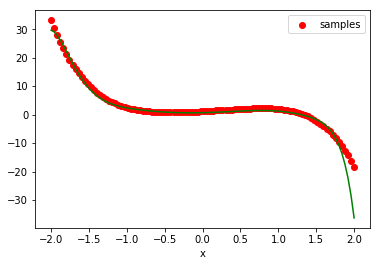

In [92]:
##Lasso

def paraestimateLassop5(Phi,sampy,lmb=1):
    H=np.hstack((np.vstack((np.dot(Phi,Phi.T),np.dot(-Phi,Phi.T))),np.vstack((np.dot(-Phi,Phi.T),np.dot(Phi,Phi.T)))))
    fa=np.vstack((np.dot(Phi,sampy),-np.dot(Phi,sampy)))
    f=lmb*np.ones((22,1))-fa
    x_ans=np.zeros((22,1))
    fun=lambda x: float(0.5*np.dot((np.dot(x.T,H)),x)+np.dot(f.T,x))
    cons=({'type': 'ineq', 'fun': lambda x: x})
    x_ans_true=opt.minimize(fun,x_ans,constraints=cons,method="SLSQP")# these 3 lines use Opt way to get the min of function
    
    print H
    print fa
    print f
    theta_plus=x_ans_true.x[0:11]
    theta_sub=x_ans_true.x[11:22]
    theta=theta_plus-theta_sub
    theta=np.expand_dims(theta, axis=1)
    return theta

theta_real_case2=paraestimateLassop5(tenPhi,sampy,lmb=1)
f_ls_5=theta_real_case2[0][0]+theta_real_case2[1][0]*polyx+theta_real_case2[2][0]*np.power(polyx,2)+theta_real_case2[3][0]*np.power(polyx,3)+theta_real_case2[4][0]*np.power(polyx,4)+theta_real_case2[5][0]*np.power(polyx,5)+theta_real_case2[6][0]*np.power(polyx,6)+theta_real_case2[7][0]*np.power(polyx,7)+theta_real_case2[8][0]*np.power(polyx,8)+theta_real_case2[9][0]*np.power(polyx,9)+theta_real_case2[10][0]*np.power(polyx,10)
mse_ls_5=meansquareerror(polyy,f_ls_5.T)
print mse_ls_5
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case2[0][0]+theta_real_case2[1][0]*x+theta_real_case2[2][0]*np.power(x,2)+theta_real_case2[3][0]*np.power(x,3)+theta_real_case2[4][0]*np.power(x,4)+theta_real_case2[5][0]*np.power(x,5)+theta_real_case2[6][0]*np.power(x,6)+theta_real_case2[7][0]*np.power(x,7)+theta_real_case2[8][0]*np.power(x,8)+theta_real_case2[9][0]*np.power(x,9)+theta_real_case2[10][0]*np.power(x,10)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()

5.432504804365465


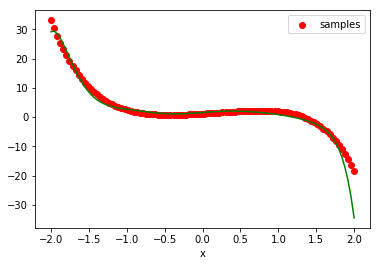

In [221]:
theta_real_case2=paraestimateRobustreg(tenPhi,sampy,lmb=1)
f_ls_5=theta_real_case2[0][0]+theta_real_case2[1][0]*polyx+theta_real_case2[2][0]*np.power(polyx,2)+theta_real_case2[3][0]*np.power(polyx,3)+theta_real_case2[4][0]*np.power(polyx,4)+theta_real_case2[5][0]*np.power(polyx,5)+theta_real_case2[6][0]*np.power(polyx,6)+theta_real_case2[7][0]*np.power(polyx,7)+theta_real_case2[8][0]*np.power(polyx,8)+theta_real_case2[9][0]*np.power(polyx,9)+theta_real_case2[10][0]*np.power(polyx,10)
mse_ls_5=meansquareerror(polyy,f_ls_5.T)
print mse_ls_5
x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=theta_real_case2[0][0]+theta_real_case2[1][0]*x+theta_real_case2[2][0]*np.power(x,2)+theta_real_case2[3][0]*np.power(x,3)+theta_real_case2[4][0]*np.power(x,4)+theta_real_case2[5][0]*np.power(x,5)+theta_real_case2[6][0]*np.power(x,6)+theta_real_case2[7][0]*np.power(x,7)+theta_real_case2[8][0]*np.power(x,8)+theta_real_case2[9][0]*np.power(x,9)+theta_real_case2[10][0]*np.power(x,10)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
plt.show()

(11, 11)
(11, 1)
(100, 1)
3.043253600622846


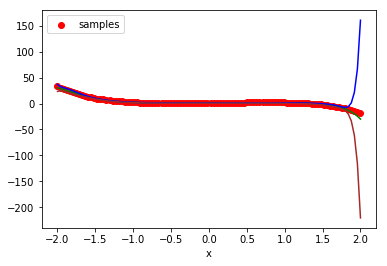

In [93]:
def esitmatesigma(Phi,alpha=1,sigma_square=5):
    temp=(1/float(sigma_square))*np.dot(Phi,Phi.T)
    m=len(Phi)
    SIGMA=np.linalg.inv(temp+(1/float(alpha))*np.eye(m))
    return SIGMA

def estimatemju(sampy,Phi,SIGMA,sigma_square=5):
    mju=(1/float(sigma_square))*np.dot(np.dot(SIGMA,Phi),sampy)
    return mju

def gaussianpredictedsigma(SIGMA,polyx_l):
    polyphi=np.zeros((1,11))
    for i in range(11):
        polyphi[0][i]=np.power(polyx_l,i)
    res=np.dot(np.dot(polyphi,SIGMA),polyphi.T)
    return res

SIGMA=esitmatesigma(tenPhi,alpha=1,sigma_square=5)
mju=estimatemju(sampy,tenPhi,SIGMA,sigma_square=5)
print SIGMA.shape
print mju.shape
sigmapredict=np.zeros((100,1))
for i in range(100):
    sigmapredict[i][0]=gaussianpredictedsigma(SIGMA,polyx[0][i])
print sigmapredict.shape
f_BR_case1=mju[0][0]+mju[1][0]*polyx+mju[2][0]*np.power(polyx,2)+mju[3][0]*np.power(polyx,3)+mju[4][0]*np.power(polyx,4)+mju[5][0]*np.power(polyx,5)+mju[6][0]*np.power(polyx,6)+mju[7][0]*np.power(polyx,7)+mju[8][0]*np.power(polyx,8)+mju[9][0]*np.power(polyx,9)+mju[10][0]*np.power(polyx,10)
mse_BR_case1=meansquareerror(polyy,f_BR_case1.T)
print mse_BR_case1

f_plus=np.zeros((1,len(polyy)))
f_sub=np.zeros((1,len(polyy)))
for i in range(len(polyy)):
    f_plus[0][i]=f_BR_case1[0][i]+sigmapredict.T[0][i]
    f_sub[0][i]=f_BR_case1[0][i]-sigmapredict.T[0][i]

f_plus=f_plus.squeeze()
f_sub=f_sub.squeeze()


 

x=np.linspace(-2,2,100)
y=np.linspace(-20,40,100)
f=mju[0][0]+mju[1][0]*x+mju[2][0]*np.power(x,2)+mju[3][0]*np.power(x,3)+mju[4][0]*np.power(x,4)+mju[5][0]*np.power(x,5)+mju[6][0]*np.power(x,6)+mju[7][0]*np.power(x,7)+mju[8][0]*np.power(x,8)+mju[9][0]*np.power(x,9)+mju[10][0]*np.power(x,10)
fig,ax=plt.subplots()
ax.scatter(data1['polyx'],data1['polyy'],c='r',marker='o',label='samples')
ax.legend()
ax.set(xlabel='x')
ax.plot(x,f,c='green')
ax.plot(x,f_plus,c='blue')
ax.plot(x,f_sub,c='brown')
plt.show()

(9, 600)
(600, 1)
(9, 400)
(400, 1)
(1, 1)


[[ 1.71840538  1.71435392  1.73471488 ... -1.1168872  -1.12653584
  -1.11876743]
 [ 0.63550837  0.56798578  0.60446373 ... -1.11178376 -1.10236248
  -1.10643402]
 [-0.53764695 -0.54446318 -0.90091259 ... -0.6308237  -0.62259792
  -0.49482174]
 ...
 [ 0.84563072  0.94763762  1.22829541 ... -0.88884166 -0.94822055
  -0.9716274 ]
 [ 1.08367608  1.01472573  1.09587867 ... -1.03400009 -1.01395503
  -1.0210064 ]
 [-1.98763845 -2.04531886 -2.0284462  ...  1.22249187  1.33951875
   1.25987542]]
